In [ ]:
import random
import zipfile
import pathlib
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zipfile = zipfile.ZipFile("pizza_steak.zip")
zipfile.extractall()
zipfile.close()

--2022-09-14 08:25:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.217.212.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   269MB/s    in 0.4s    

2022-09-14 08:25:44 (269 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

In [ ]:
for dir_path, dir_name, file_name in os.walk("pizza_steak"):
    print(f"There are {len(dir_name)} directories and {len(dir_name)} images in {dir_path}")

There are 2 directories and 2 images in pizza_steak
There are 2 directories and 2 images in pizza_steak/train
There are 0 directories and 0 images in pizza_steak/train/pizza
There are 0 directories and 0 images in pizza_steak/train/steak
There are 2 directories and 2 images in pizza_steak/test
There are 0 directories and 0 images in pizza_steak/test/pizza
There are 0 directories and 0 images in pizza_steak/test/steak


In [ ]:
num_train_pizza_images = len(os.listdir("pizza_steak/train/pizza"))
num_train_steak_images = len(os.listdir("pizza_steak/train/steak"))
num_train_pizza_images,num_train_steak_images

(750, 750)

In [ ]:
filepath = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(file.name for file in filepath.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
def view_random_image(directory,class_name):
  filepath = "pizza_steak"+"/"+directory+"/"+class_name+"/"
  print(filepath)
  random_image = random.sample(os.listdir(filepath),1)
  img = mpimg.imread(filepath+"/"+random_image[0])
  plt.imshow(img)
  plt.title(class_name)
  plt.axis("off")
  return img

pizza_steak/train/pizza/


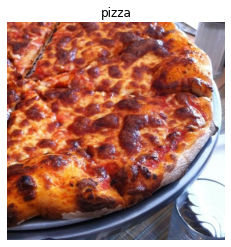

In [ ]:
img = view_random_image("train","pizza")

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
img.ndim

3

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[202,  90,  79],
        [198,  87,  76],
        [197,  86,  75],
        ...,
        [ 54,  50,  65],
        [ 54,  50,  65],
        [ 53,  49,  64]],

       [[198,  91,  75],
        [191,  84,  68],
        [185,  77,  64],
        ...,
        [ 57,  53,  68],
        [ 58,  54,  69],
        [ 59,  55,  70]],

       [[177,  75,  53],
        [172,  70,  48],
        [167,  65,  43],
        ...,
        [ 56,  52,  67],
        [ 55,  51,  66],
        [ 55,  51,  66]],

       ...,

       [[ 47,  48,  66],
        [ 47,  48,  66],
        [ 47,  48,  66],
        ...,
        [ 65,  80, 119],
        [ 60,  75, 116],
        [ 55,  73, 113]],

       [[ 53,  54,  74],
        [ 56,  57,  77],
        [ 55,  56,  76],
        ...,
        [ 65,  78, 120],
        [ 67,  82, 123],
        [ 67,  82, 125]],

       [[ 71,  72,  92],
        [ 77,  78,  98],
        [ 75,  76,  96],
        ...,
        [ 68,  81, 12

In [ ]:
tf.random.set_seed(42)
scaling = Rescaling(1./255)

train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

train_data = image_dataset_from_directory(train_dir,
                                          image_size=(224,224),
                                          batch_size=32,
                                          seed=42)
valid_data = image_dataset_from_directory(valid_dir,
                                          image_size=(224,224),
                                          batch_size=32,
                                          seed=42)

train_data_scaled = train_data.map(lambda x,y: (scaling(x),y))
valid_data_scaled = valid_data.map(lambda x,y: (scaling(x),y))

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),       
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")                                                                    
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history = model_1.fit(train_data_scaled,epochs=5,steps_per_epoch=len(train_data_scaled),validation_data=valid_data_scaled,validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 5s 91ms/step - loss: 0.6014 - accuracy: 0.6707 - val_loss: 0.4498 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 5s 89ms/step - loss: 0.4464 - accuracy: 0.7933 - val_loss: 0.4239 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 5s 88ms/step - loss: 0.3990 - accuracy: 0.8327 - val_loss: 0.3408 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 5s 87ms/step - loss: 0.3652 - accuracy: 0.8487 - val_loss: 0.3313 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 5s 88ms/step - loss: 0.3358 - accuracy: 0.8627 - val_loss: 0.3127 - val_accuracy: 0.8840


In [ ]:
len(train_data)

47

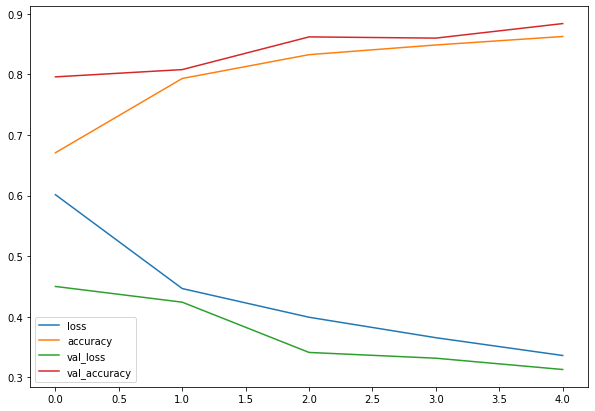

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.plot(epochs,loss,label="training loss")
    plt.plot(epochs,val_loss,label="Val loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training accuracy")
    plt.plot(epochs,val_accuracy,label="Val Accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()



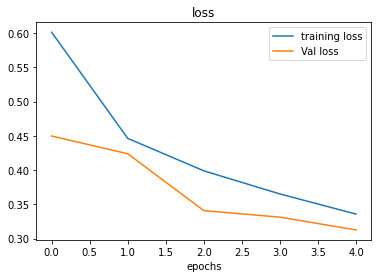

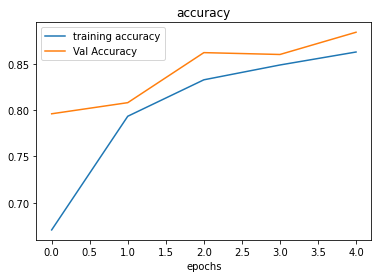

In [ ]:
plot_loss_curves(history)

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3,strides=1,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3,strides=1,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3,strides=1,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history = model_2.fit(train_data_scaled,epochs=5,steps_per_epoch=len(train_data_scaled),validation_data=valid_data_scaled,validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 5s 88ms/step - loss: 0.5916 - accuracy: 0.6747 - val_loss: 0.4680 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 84ms/step - loss: 0.4746 - accuracy: 0.7947 - val_loss: 0.4409 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.4314 - accuracy: 0.7987 - val_loss: 0.3610 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 83ms/step - loss: 0.3953 - accuracy: 0.8320 - val_loss: 0.3526 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 4s 81ms/step - loss: 0.3856 - accuracy: 0.8367 - val_loss: 0.3275 - val_accuracy: 0.8660


In [ ]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 26, 26, 10)     

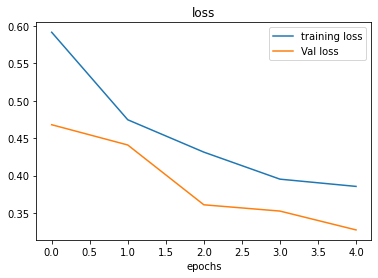

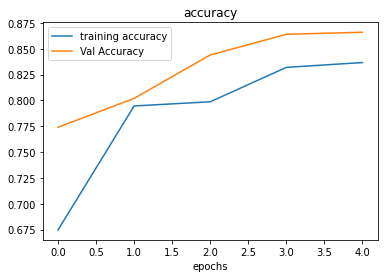

In [ ]:
plot_loss_curves(history)

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3,strides=1,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.AvgPool2D(pool_size=2,strides=1,padding="same"),
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3,strides=1,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.AvgPool2D(pool_size=2,strides=1,padding="same"),
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3,strides=1,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.AvgPool2D(pool_size=2,strides=1,padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history = model_3.fit(train_data_scaled,epochs=5,steps_per_epoch=len(train_data_scaled),validation_data=valid_data_scaled,validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 5s 94ms/step - loss: 0.6958 - accuracy: 0.6927 - val_loss: 0.4854 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 5s 94ms/step - loss: 0.4217 - accuracy: 0.8200 - val_loss: 0.4151 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 5s 93ms/step - loss: 0.3832 - accuracy: 0.8333 - val_loss: 0.3436 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 5s 95ms/step - loss: 0.3027 - accuracy: 0.8860 - val_loss: 0.3319 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 5s 92ms/step - loss: 0.2477 - accuracy: 0.9080 - val_loss: 0.3545 - val_accuracy: 0.8480


## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train datta augmented
train_datagen_augmented = ImageDataGenerator(rescale=1./255,rotation_range=2,shear_range=2,zoom_range=2,width_shift_range=2,height_shift_range=2,horizontal_flip=True)

# train data not augmented
train_datagen = ImageDataGenerator(rescale=1./255)

# test data not augmented
test_datagen = ImageDataGenerator(rescale=1./255)




In [ ]:
# Import data from directory and augment it
print("Augmented Data Batches")
train_data_augmented =  train_datagen_augmented.flow_from_directory(train_dir,
                                                                    batch_size=32,
                                                                    target_size=(224,224),
                                                                    class_mode="binary",
                                                                    shuffle=False)

# Create non_augmented training data batches
print("Non Augmented Training Data Batches")
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)

# Create non_augmented test data batches
print("Non Augmented Test Data Batches")
test_data = test_datagen.flow_from_directory(valid_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            shuffle=False)


Augmented Data Batches
Found 1500 images belonging to 2 classes.
Non Augmented Training Data Batches
Found 1500 images belonging to 2 classes.
Non Augmented Test Data Batches
Found 500 images belonging to 2 classes.


In [ ]:
augmented_images, labels = train_data_augmented.next()
normal_images, normal_labels = train_data.next()

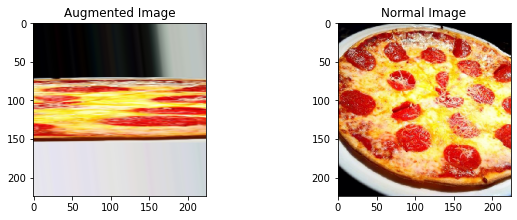

In [ ]:
# Visualizing the augmented image
plt.figure(figsize=(10,7))
plt.subplot(2,2, 1)
plt.imshow(augmented_images[23])
plt.title("Augmented Image")
plt.subplot(2,2, 2)
plt.imshow(normal_images[23])
plt.title("Normal Image");


In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size = 3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.AvgPool2D(2,padding="valid"),
    tf.keras.layers.Conv2D(filters=10,kernel_size = 3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.AvgPool2D(2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history = model_4.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 498ms/step - loss: 0.7130 - accuracy: 0.4747 - val_loss: 0.6895 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6991 - accuracy: 0.5600 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6769 - accuracy: 0.5633 - val_loss: 0.6214 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 23s 493ms/step - loss: 0.6711 - accuracy: 0.5953 - val_loss: 0.5551 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.6349 - accuracy: 0.6780 - val_loss: 0.5924 - val_accuracy: 0.6040


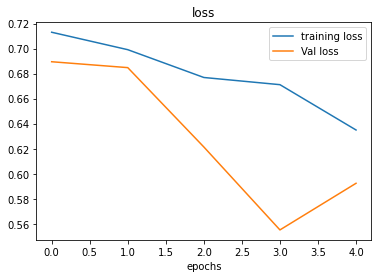

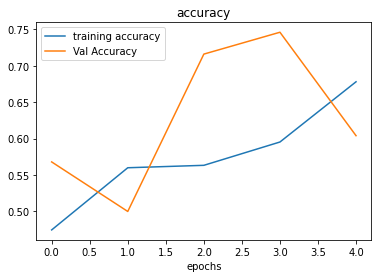

In [ ]:
plot_loss_curves(history)

## Shuffling Augmented Data

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    batch_size=32,
                                                                    target_size=(224,224),
                                                                    class_mode="binary",
                                                                    shuffle=True,
                                                                    seed=42)

Found 1500 images belonging to 2 classes.


In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size = 3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_5 = model_5.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 509ms/step - loss: 0.7057 - accuracy: 0.4153 - val_loss: 0.6923 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6937 - accuracy: 0.4473 - val_loss: 0.6926 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6923 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6929 - accuracy: 0.5060 - val_loss: 0.6913 - val_accuracy: 0.5700
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6888 - accuracy: 0.5627 - val_loss: 0.6684 - val_accuracy: 0.5960


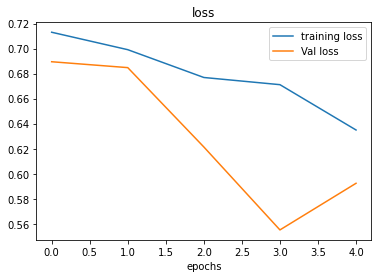

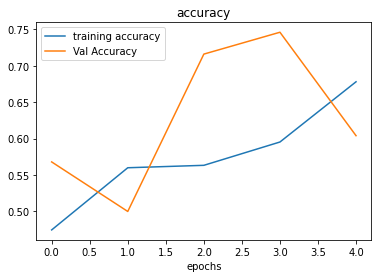

In [ ]:
plot_loss_curves(history)

Since we've already improved our baseline model, there are number of things we could try:
1. Add more Conv2D/MaxPool2D layers
2. Increase the number of filters in Conv2D layers
3. Increase the number of epochs
4. Find the ideal learning rate
5. Get more data
6. Use **transfer learning**

In [ ]:
## adding more layers and increasing number of filters
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size = 3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_6 = model_6.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented_shuffled),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 509ms/step - loss: 0.8193 - accuracy: 0.4993 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6885 - accuracy: 0.5453 - val_loss: 0.6558 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 24s 503ms/step - loss: 0.7455 - accuracy: 0.4633 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.7406 - accuracy: 0.5820 - val_loss: 0.7156 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 24s 503ms/step - loss: 0.7054 - accuracy: 0.5300 - val_loss: 0.6830 - val_accuracy: 0.5000


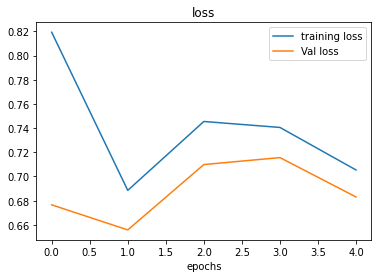

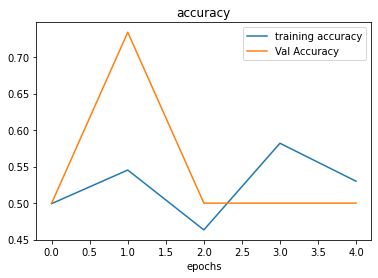

In [ ]:
plot_loss_curves(history_6)

In [ ]:
## Increasing number of epochs
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size = 3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented,epochs=10,steps_per_epoch=len(train_data_augmented_shuffled),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 506ms/step - loss: 1.5456 - accuracy: 0.5600 - val_loss: 0.6869 - val_accuracy: 0.5400
Epoch 2/10
47/47 [==============================] - 24s 500ms/step - loss: 0.6846 - accuracy: 0.5360 - val_loss: 0.6579 - val_accuracy: 0.6900
Epoch 3/10
47/47 [==============================] - 24s 500ms/step - loss: 0.6936 - accuracy: 0.5807 - val_loss: 0.6378 - val_accuracy: 0.6920
Epoch 4/10
47/47 [==============================] - 24s 500ms/step - loss: 0.6804 - accuracy: 0.5580 - val_loss: 0.6294 - val_accuracy: 0.7260
Epoch 5/10
47/47 [==============================] - 23s 499ms/step - loss: 0.6504 - accuracy: 0.6320 - val_loss: 0.7084 - val_accuracy: 0.5100
Epoch 6/10
47/47 [==============================] - 24s 511ms/step - loss: 0.6992 - accuracy: 0.5613 - val_loss: 0.5916 - val_accuracy: 0.7460
Epoch 7/10
47/47 [==============================] - 23s 498ms/step - loss: 0.6796 - accuracy: 0.6060 - val_loss: 0.6000 - val_accuracy: 0.6680

In [ ]:
plot_loss_curves(history_7)

## Making Predictions on My Own Custom Photo

In [ ]:
pizza_img = mpimg.imread("pizza_image.jpeg")

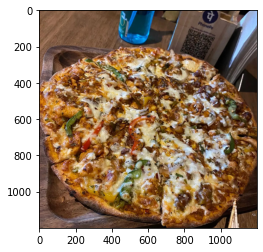

In [ ]:
plt.imshow(pizza_img)

In [ ]:
pizza_img.shape

(1200, 1200, 3)

In [ ]:
pizza_img.ndim

3

In [ ]:
#preprocess input image
def preprocess_image(filename):
  image = tf.io.read_file(filename)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image,size=(224,224))
  image = image/255.
  image = tf.expand_dims(image,axis=0)
  return image

In [ ]:
pizza_img = preprocess_image("pizza_image.jpeg")
pizza_img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pizza_img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.4417367 , 0.3044818 , 0.21820728],
         [0.46587136, 0.32861644, 0.24234192],
         [0.47717088, 0.33991596, 0.25364146],
         ...,
         [0.6160315 , 0.71014917, 0.85916877],
         [0.61965346, 0.73127836, 0.8917831 ],
         [0.6110644 , 0.74047613, 0.9169467 ]],

        [[0.45579234, 0.3185374 , 0.2322629 ],
         [0.4784514 , 0.34119648, 0.25492197],
         [0.47753102, 0.34027612, 0.2540016 ],
         ...,
         [0.6256002 , 0.7215386 , 0.88862544],
         [0.62829673, 0.7445389 , 0.9250814 ],
         [0.6146157 , 0.74584824, 0.940386  ]],

        [[0.47010306, 0.33284816, 0.24657363],
         [0.4694678 , 0.3322129 , 0.24593836],
         [0.50462186, 0.36736697, 0.28109244],
         ...,
         [0.62437004, 0.7302524 , 0.9145661 ],
         [0.621958  , 0.74324703, 0.9411465 ],
         [0.6163116 , 0.7535665 , 0.9653312 ]],

        ...,

        [[0.49790785, 0.41163334, 

In [ ]:
## making predictions

prediction = np.around(model_1.predict(pizza_img))

In [ ]:
prediction

array([[0.]], dtype=float32)